In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/MasterClass_DataScience_Machine_Learning_Notebooks_et_Datasets/MasterClass_DataScience_Machine_Learning_Notebooks_et_Datasets/_DATA/gene_expression.csv')

In [ ]:
data.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [ ]:
import seaborn as sns

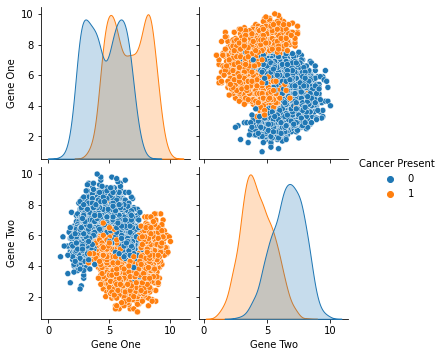

In [ ]:
sns.pairplot(data,hue='Cancer Present')

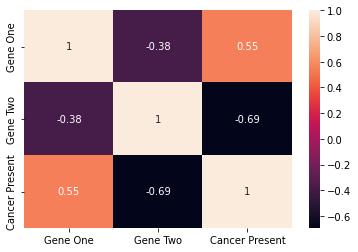

In [ ]:
sns.heatmap(data.corr(),annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


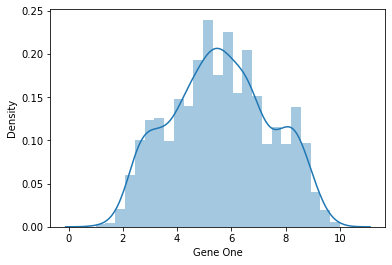

In [ ]:
sns.distplot(data['Gene One'])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X=data.drop('Cancer Present',axis=1)
y=data['Cancer Present']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
scaler=StandardScaler().fit(X_train)

In [ ]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=6)

In [ ]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
model.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(n_neighbors=6)>

In [ ]:
pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import *

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       423
           1       0.95      0.94      0.94       477

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [ ]:
confusion_matrix(y_test,pred)

array([[399,  24],
       [ 30, 447]])

In [ ]:
test_error=[]
for k in range(1,30):
  KNN_model=KNeighborsClassifier(n_neighbors=k)
  KNN_model.fit(X_train,y_train)
  pred=KNN_model.predict(X_test)
  test_er=1-accuracy_score(y_test,pred)
  test_error.append(test_er)


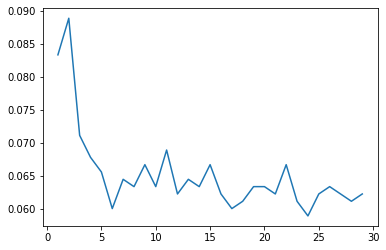

In [ ]:
plt.plot(range(1,30),test_error)

In [ ]:
scaler=StandardScaler()
knn=KNeighborsClassifier()

In [ ]:
operation=[('scaler',scaler),('knn',knn)]

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe=Pipeline(operation)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
k_values=list(range(1,20))

In [ ]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
param_grid={'knn__n_neighbors':k_values}

In [ ]:
full_cv=GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [ ]:
full_cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [ ]:
from numpy.core.numeric import full
full_cv.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')>

In [ ]:
full_cv.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=18))])

In [ ]:
pd.DataFrame(test_error)

,0
0,0.083333
1,0.088889
2,0.071111
3,0.067778
4,0.065556
5,0.060000
6,0.064444
7,0.063333
8,0.066667
9,0.063333


In [ ]:
print(classification_report(y_test,full_cv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       423
           1       0.94      0.94      0.94       477

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [ ]:
new=np.array([3.8,6.4]).reshape(1,2)

In [ ]:
full_cv.predict(new)

array([0])

In [ ]:
np.array([1,2]).reshape(1,2)

array([[1, 2]])

In [ ]:
full_cv.predict_proba(new)

array([[0.72222222, 0.27777778]])

In [ ]:
model.predict_proba(new)

array([[0.66666667, 0.33333333]])